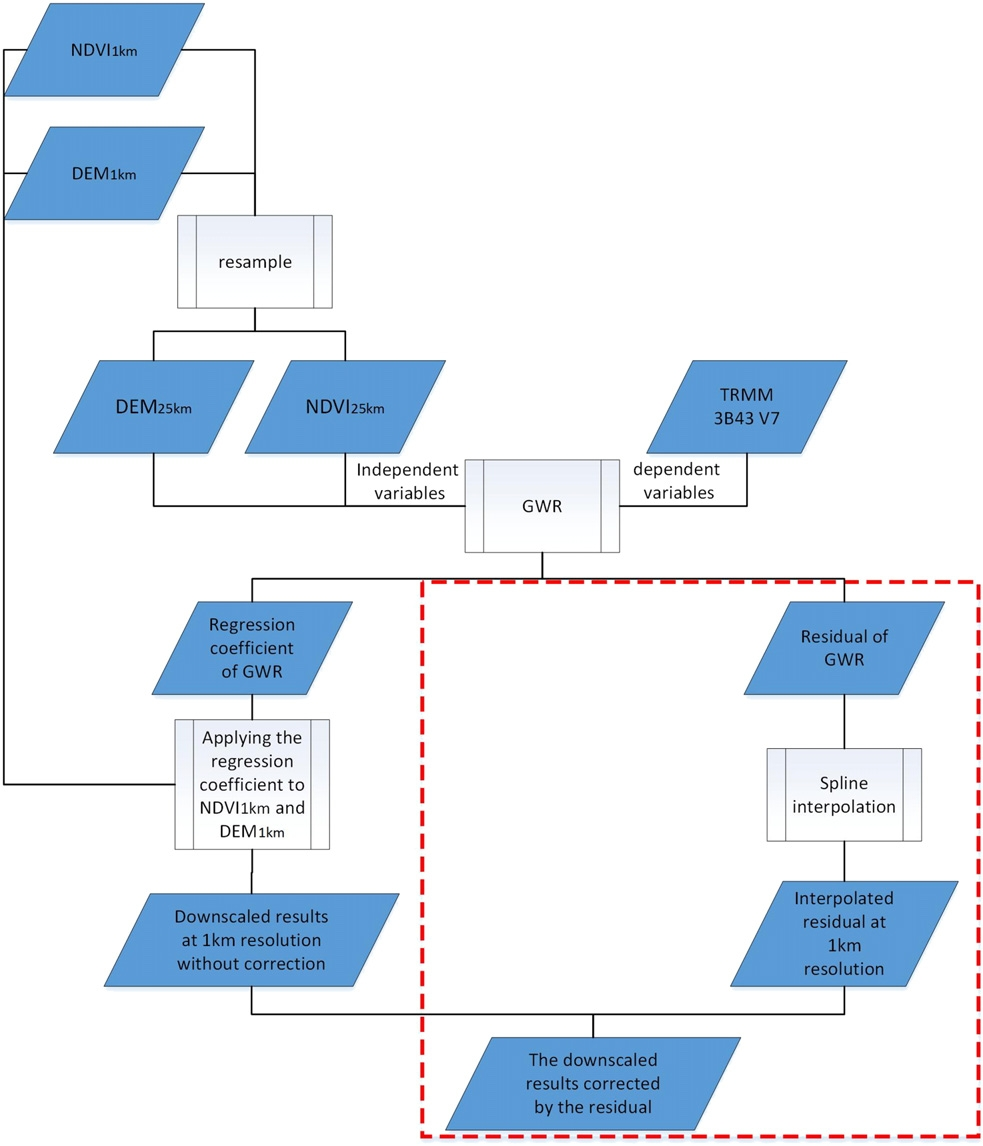

# Load Precipitation from TRMM3B43

In [20]:
import os
import h5py
import numpy as np
#%pip install xarray
import xarray as xr
import os,glob
import numpy as np
#%pip install pyhdf.SD
#from pyhdf.SD import SD

hdf_dir = "D:/Desktop/mentor_research/code/dataset/hdf_files"
# list of all hdf files
hdf_files = [os.path.join(hdf_dir, f) for f in os.listdir(hdf_dir) if f.endswith(".HDF")]

print(f"Found {len(hdf_files)} HDF files:")
for f in hdf_files:
    print(f)


Found 12 HDF files:
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010101.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010201.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010301.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010401.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010501.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010601.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010701.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010801.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010901.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20011001.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20011101.7A.HDF
D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20011201.7A.HDF


In [21]:
import os
import numpy as np
from pyhdf.SD import SD, SDC

In [22]:

file_path = 'D:/Desktop/mentor_research/code/dataset/hdf_files/3B43.20010101.7A.HDF'

dataset = SD('D:/Desktop/mentor_research/code/dataset/hdf_files/3B43.20010101.7A.HDF', SDC.READ)
dataset 

In [23]:
# TRMM3B43 precipitation data 01/01/2001-12/31/2001
# month
# 0.25 degree
from pyhdf.SD import SD, SDC
filepath = "D:/Desktop/mentor_research/code/dataset/hdf_files/3B43.20010101.7A.HDF"
trmm = SD(filepath, SDC.READ)
attrs = trmm.attributes()
for attr_name, attr_value in attrs.items():
    print(f"{attr_name}: {attr_value}")
# Month
# LatitudeResolution=0.25;
# LongitudeResolution=0.25; 

FileHeader: AlgorithmID=3B43;
AlgorithmVersion=3B43_7.0;
FileName=3B43.20010101.7A.HDF;
GenerationDateTime=2012-11-28T04:06:48.000Z;
StartGranuleDateTime=2001-01-01T00:00:00.000Z;
StopGranuleDateTime=2001-01-31T23:59:59.999Z;
GranuleNumber=;
NumberOfSwaths=0;
NumberOfGrids=1;
GranuleStart=;
TimeInterval=MONTH;
ProcessingSystem=PPS;
ProductVersion=7A;
MissingData=;

FileInfo: DataFormatVersion=m;
TKCodeBuildVersion=1;
MetadataVersion=m;
FormatPackage=HDF Version 4.2 Release 4, January 25, 2009;
BlueprintFilename=TRMM.V7.3B43.blueprint.xml;
BlueprintVersion=BV_13;
TKIOVersion=1.6;
MetadataStyle=PVL;
EndianType=LITTLE_ENDIAN;

GridHeader: BinMethod=ARITHMETIC_MEAN;
Registration=CENTER;
LatitudeResolution=0.25;
LongitudeResolution=0.25;
NorthBoundingCoordinate=50;
SouthBoundingCoordinate=-50;
EastBoundingCoordinate=180;
WestBoundingCoordinate=-180;
Origin=SOUTHWEST;



In [24]:
# Extracting precipitation data for IBERIA
iberia_lat_range = (36, 44)
iberia_lon_range = (-9, 3)

precip = trmm.select('precipitation')[:]
precip = np.transpose(precip)

theLats = np.arange(-49.875, 50, 0.25) 
theLons = np.arange(-179.875, 180, 0.25)

precip[precip < 0] = np.nan

lat_mask = (theLats >= iberia_lat_range[0]) & (theLats <= iberia_lat_range[1])
lon_mask = (theLons >= iberia_lon_range[0]) & (theLons <= iberia_lon_range[1])

precip_iberia = precip[lat_mask, :][:, lon_mask]
lats_iberia = theLats[lat_mask]
lons_iberia = theLons[lon_mask]

print(f"Extracted precipitation data shape: {precip_iberia.shape}")
print(f"Latitude range: {lats_iberia.min()} to {lats_iberia.max()}")
print(f"Longitude range: {lons_iberia.min()} to {lons_iberia.max()}")

Extracted precipitation data shape: (32, 48)
Latitude range: 36.125 to 43.875
Longitude range: -8.875 to 2.875


In [25]:
precip_iberia_original = precip_iberia.copy()

In [26]:
# Loop through all TRMM files
import os
import glob
import numpy as np
from pyhdf.SD import SD, SDC
data_dir = "D:/Desktop/mentor_research/code/dataset/hdf_files/"

hdf_files = glob.glob(os.path.join(data_dir, "*.HDF"))

iberia_lat_range = (36, 44)
iberia_lon_range = (-9, 3)
theLats = np.arange(-49.875, 50, 0.25)
theLons = np.arange(-179.875, 180, 0.25)

iberia_precip_data = {}

for filepath in hdf_files:
    print(f"Processing: {filepath}")
    
    trmm = SD(filepath, SDC.READ)
    
    precip = trmm.select('precipitation')[:]
    precip = np.transpose(precip)  # TRMM data usually requires transposition

    # Process invalid data (set negative values to NaN)
    precip[precip < 0] = np.nan

    # ✅ Extract data for the Iberian Peninsula region
    lat_mask = (theLats >= iberia_lat_range[0]) & (theLats <= iberia_lat_range[1])
    lon_mask = (theLons >= iberia_lon_range[0]) & (theLons <= iberia_lon_range[1])
    
    precip_iberia = precip[lat_mask, :][:, lon_mask]
    lats_iberia = theLats[lat_mask]
    lons_iberia = theLons[lon_mask]

    # ✅ Extract time information from the filename
    filename = os.path.basename(filepath)
    date_str = filename.split(".")[1]  # e.g., 20010101 from `3B43.20010101.7A.HDF`
    
    # ✅ Store the data
    iberia_precip_data[date_str] = {
        "precipitation": precip_iberia,
        "lats": lats_iberia,
        "lons": lons_iberia
    }
    
    print(f"✅ Processed {filename} | Data Shape: {precip_iberia.shape}")

# ✅ Check the extracted time range
print(f"Extracted data for {len(iberia_precip_data)} months")


Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010101.7A.HDF
✅ Processed 3B43.20010101.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010201.7A.HDF
✅ Processed 3B43.20010201.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010301.7A.HDF
✅ Processed 3B43.20010301.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010401.7A.HDF
✅ Processed 3B43.20010401.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010501.7A.HDF
✅ Processed 3B43.20010501.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010601.7A.HDF
✅ Processed 3B43.20010601.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/mentor_research/code/dataset/hdf_files\3B43.20010701.7A.HDF
✅ Processed 3B43.20010701.7A.HDF | Data Shape: (32, 48)
Processing: D:/Desktop/ment

In [27]:
iberia_precip_data

{'20010101': {'precipitation': array([[0.0453629 , 0.03995968, 0.05939517, ..., 0.248377  , 0.24226555,
          0.2355642 ],
         [0.05358871, 0.03774194, 0.05237903, ..., 0.28646806, 0.29882795,
          0.29839   ],
         [0.06629033, 0.0366129 , 0.04741936, ..., 0.28190213, 0.3266886 ,
          0.3215991 ],
         ...,
         [0.503428  , 0.5080353 , 0.5289576 , ..., 0.1742279 , 0.1843067 ,
          0.19935474],
         [0.5030268 , 0.50655353, 0.4943265 , ..., 0.17680979, 0.18681128,
          0.20157938],
         [0.5162236 , 0.5091128 , 0.49040043, ..., 0.1757659 , 0.1854332 ,
          0.1970876 ]], dtype=float32),
  'lats': array([36.125, 36.375, 36.625, 36.875, 37.125, 37.375, 37.625, 37.875,
         38.125, 38.375, 38.625, 38.875, 39.125, 39.375, 39.625, 39.875,
         40.125, 40.375, 40.625, 40.875, 41.125, 41.375, 41.625, 41.875,
         42.125, 42.375, 42.625, 42.875, 43.125, 43.375, 43.625, 43.875]),
  'lons': array([-8.875, -8.625, -8.375, -8.125, -

In [28]:
import xarray as xr
import numpy as np
import os

# ✅ Get time dimension (maintaining the YYYYMMDD format)
time_values = sorted(iberia_precip_data.keys())  # '20010101', '20010201', ..., '20011201'
time_values_dt = np.array([np.datetime64(f"{t[:4]}-{t[4:6]}-{t[6:8]}") for t in time_values])  # Convert to datetime64

# ✅ Extract precipitation data and check shape
precip_arrays = [iberia_precip_data[t]['precipitation'] for t in time_values]
lats = iberia_precip_data[time_values[0]]['lats']  # Use the original key without modifying the format
lons = iberia_precip_data[time_values[0]]['lons']

# ✅ Convert to Xarray DataArray
precip_da = xr.DataArray(
    data=np.stack(precip_arrays),  # Stack along the time dimension
    dims=("time", "lats", "lons"),
    coords={"time": time_values_dt, "lats": lats, "lons": lons},
    attrs={"description": "Monthly precipitation data for the Iberian Peninsula"}
)

# ✅ Convert to Dataset and store
precip_ds = xr.Dataset({"precipitation": precip_da})

# ✅ View the data structure
print(precip_ds)

# ✅ Save as NetCDF file
output_dir = r"D:\Desktop\mentor_research\code\dataset\Precipitation_processed"
os.makedirs(output_dir, exist_ok=True)
precip_ds.to_netcdf(os.path.join(output_dir, "precip_2001_resampled.nc"))

print(f"✅ Precipitation data has been converted and stored at {output_dir}")


<xarray.Dataset>
Dimensions:        (time: 12, lats: 32, lons: 48)
Coordinates:
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
Data variables:
    precipitation  (time, lats, lons) float32 0.04536 0.03996 ... 0.04851 0.0387
✅ Precipitation data has been converted and stored at D:\Desktop\mentor_research\code\dataset\Precipitation_processed


C:\Users\18857\AppData\Local\Temp\ipykernel_79720\1105593896.py:15: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  precip_da = xr.DataArray(


# Load NDVI from MODIS(MOD13A3 v6)
drop NDVI<0

In [29]:
# instead of NDVI from spot, we use NDVI from MODIS(MOD13A3 v6)

In [30]:
# 用google engine下载NDVI到google drive上
# 4/1AQSTgQHeKdW804jBUvhhgVTx14qiIZVe_aYS3pyfclk0PYeZ9UrHsmD9STM
import ee
ee.Authenticate()
ee.Initialize()

In [31]:
# import ee
# # The raw values in the dataset are in the range (−10,000 to 10,000) instead of (-1 to 1).
# # Initialize GEE
# ee.Initialize()

# # Define the region and time range
# iberia_bbox = ee.Geometry.Rectangle(
#     coords=[-9, 36, 3, 44],  # Format: [min_lon, min_lat, max_lon, max_lat]
#     proj="EPSG:4326",
#     geodesic=False
# )

# date_range = ('2001-01-01', '2001-12-31')

# # Load the MODIS monthly NDVI dataset (MOD13A3 v6)
# modis_ndvi = ee.ImageCollection('MODIS/061/MOD13A3') \
#     .filterDate(*date_range) \
#     .filterBounds(iberia_bbox) \
#     .select('NDVI')  # NDVI band

# # Print dataset information (optional)
# print(f"Dataset size: {modis_ndvi.size().getInfo()} images")

# # Export all monthly data to Google Drive
# for i in range(1, 13):
#     # Get single month data
#     monthly_image = modis_ndvi.filter(ee.Filter.calendarRange(i, i, 'month')).first()
    
#     # Define export task
#     task = ee.batch.Export.image.toDrive(
#         image=monthly_image.clip(iberia_bbox),
#         description=f'NDVI_2001_{i:02d}',
#         folder='GEE_Exports',  # Folder name in Google Drive
#         region=iberia_bbox,
#         scale=1000,  # 1 km resolution
#         crs='EPSG:4326',
#         fileFormat='GeoTIFF'
#     )
#     task.start()
#     print(f'Task 2001-{i:02d} submitted. Status: {task.status()["state"]}')

# print("All tasks submitted, please check Google Drive for downloads.")


In [32]:
import ee

# Initialize GEE
ee.Initialize()

# Define region and time range
iberia_bbox = ee.Geometry.Rectangle(
    coords=[-9, 36, 3, 44],  # [min_lon, min_lat, max_lon, max_lat]
    proj="EPSG:4326",
    geodesic=False
)

date_range = ('2001-01-01', '2001-12-31')

# Load MODIS NDVI dataset
modis_ndvi = ee.ImageCollection('MODIS/061/MOD13A3') \
    .filterDate(*date_range) \
    .filterBounds(iberia_bbox) \
    .select('NDVI')

# Print dataset info
print(f"Dataset size: {modis_ndvi.size().getInfo()} images")

# Export monthly NDVI data to Google Drive
for i in range(1, 13):
    # Retrieve the first image for the given month and scale NDVI
    monthly_image = modis_ndvi.filter(ee.Filter.calendarRange(i, i, 'month')).first()
    
    # Apply scaling correction
    monthly_image = monthly_image.multiply(0.0001).clip(iberia_bbox)  # Scale factor: 1/10,000

    # Define export task
    task = ee.batch.Export.image.toDrive(
        image=monthly_image,
        description=f'NDVI_2001_{i:02d}',
        folder='GEE_Exports1',  # Google Drive folder
        region=iberia_bbox,
        scale=1000,  # 1km resolution
        crs='EPSG:4326',
        fileFormat='GeoTIFF'
    )
    task.start()
    print(f'Task 2001-{i:02d} submitted. Status: {task.status()["state"]}')

print("All tasks have been submitted. Check Google Drive for results.")


Dataset size: 12 images
Task 2001-01 submitted. Status: READY
Task 2001-02 submitted. Status: READY
Task 2001-03 submitted. Status: READY
Task 2001-04 submitted. Status: READY
Task 2001-05 submitted. Status: READY
Task 2001-06 submitted. Status: READY
Task 2001-07 submitted. Status: READY
Task 2001-08 submitted. Status: READY
Task 2001-09 submitted. Status: READY
Task 2001-10 submitted. Status: READY
Task 2001-11 submitted. Status: READY
Task 2001-12 submitted. Status: READY
All tasks have been submitted. Check Google Drive for results.


In [33]:
#  reload D:\Desktop\mentor_research\code\dataset\GEE_Exports这个目录下的12张有关NDVI的月度tif

In [34]:
import os
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from rasterio.plot import show
import xarray as xr

# 1km resolution data
# Configuration parameters
tif_dir = r"D:\\Desktop\\mentor_research\\code\\dataset\\GEE_Exports"
output_dir = r"D:\\Desktop\\mentor_research\\code\\dataset\\NDVI_processed"
os.makedirs(output_dir, exist_ok=True)

# Step 1: Read all TIFF files ------------------------------------------------------
def read_ndvi_tifs(tif_dir):
    """Read all NDVI TIFF files in the directory and sort them by time"""
    files = [f for f in os.listdir(tif_dir) if f.endswith('.tif') and 'NDVI' in f]
    files.sort()
    
    datasets = []
    for f in files:
        path = os.path.join(tif_dir, f)
        with rasterio.open(path) as src:
            data = src.read(1)
            meta = src.meta.copy()
            transform = src.transform
            
            # Convert CRS to a WKT string or EPSG code
            crs_str = src.crs.to_wkt()  # or use src.crs.to_epsg()
            
            da = xr.DataArray(
                data,
                dims=('lats', 'lons'),
                coords={
                    'lats': np.arange(data.shape[0]) * transform[4] + transform[5],
                    'lons': np.arange(data.shape[1]) * transform[0] + transform[2]
                },
                attrs={
                    'crs': crs_str,  # Use string instead of CRS object
                    'transform': list(transform),  # Convert Affine object to list
                    'month': f.split('_')[2][:2]
                }
            )
            datasets.append(da)
    
    ds = xr.concat(datasets, dim='time').assign_coords(
        time=np.arange(1, 13)
    )
    return ds

# Read data
ndvi_ds_1km = read_ndvi_tifs(tif_dir)
# Correct NDVI scaling by dividing all values by 10,000
ndvi_ds_1km = ndvi_ds_1km / 10000.0

# Step 2: Basic data analysis ------------------------------------------------------
# View dataset structure
print("Dataset structure:\n", ndvi_ds_1km)

# Calculate monthly average
monthly_avg = ndvi_ds_1km.mean(dim=['lons', 'lats'])

# Calculate annual average
annual_avg = ndvi_ds_1km.mean(dim='time')

# Step 3: Visual analysis ------------------------------------------------------
# Monthly trend curve
plt.figure(figsize=(10, 5))
monthly_avg.plot(marker='o', color='green')
plt.title('2001 Monthly NDVI Variation for the Iberian Peninsula')
plt.ylabel('NDVI')
plt.xlabel('Month')
plt.xticks(range(12), [f'{i+1} month' for i in range(12)])
plt.savefig(os.path.join(output_dir, 'monthly_trend.png'))
plt.close()

# Spatial distribution of annual average
plt.figure(figsize=(12, 8))
annual_avg.plot(cmap='YlGn', add_colorbar=True)
plt.title('Spatial Distribution of Annual Average NDVI in 2001')
plt.axis('off')
plt.savefig(os.path.join(output_dir, 'annual_avg.png'))
plt.close()

# Step 4: Data export ------------------------------------------------------
# Save as NetCDF format
ndvi_ds_1km.to_netcdf(os.path.join(output_dir, 'ndvi_2001_1km.nc'))

# Save statistical results
with open(os.path.join(output_dir, 'statistics.txt'), 'w') as f:
    f.write(f"Annual average NDVI: {annual_avg.mean().values:.3f}\n")
    f.write(f"Highest monthly NDVI: {monthly_avg.max().values:.3f} (Month {int(monthly_avg.argmax())})\n")
    f.write(f"Lowest monthly NDVI: {monthly_avg.min().values:.3f} (Month {int(monthly_avg.argmin())})\n")

print("Analysis results have been saved to:", output_dir)


Dataset structure:
 <xarray.DataArray (time: 12, lats: 892, lons: 1336)>
array([[[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6247, 0.6247, 0.6186],
        [0.    , 0.    , 0.    , ..., 0.6192, 0.6192, 0.5791],
        ...,
        [0.    , 0.    , 0.    , ..., 0.224 , 0.224 , 0.1662],
        [0.    , 0.    , 0.    , ..., 0.2035, 0.2035, 0.1763],
        [0.    , 0.    , 0.    , ..., 0.1707, 0.1707, 0.1954]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.5994, 0.5994, 0.5946],
        [0.    , 0.    , 0.    , ..., 0.5929, 0.5929, 0.5884],
        ...,
        [0.    , 0.    , 0.    , ..., 0.2289, 0.2289, 0.1772],
        [0.    , 0.    , 0.    , ..., 0.2119, 0.2119, 0.2075],
        [0.    , 0.    , 0.    , ..., 0.1824, 0.1824, 0.2394]],

       [[0.    , 0.    , 0.    , ..., 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , ..., 0.6892, 0.6892, 0.6395],
        [0.    

In [35]:
new_time_values = np.array([np.datetime64(f"2001-{month:02d}-01") for month in range(1, 13)])
ndvi_ds_1km = ndvi_ds_1km.assign_coords(time=new_time_values)
ndvi_ds_1km = ndvi_ds_1km.to_dataset(name="ndvi")
ndvi_ds_1km['ndvi'] = xr.where(ndvi_ds_1km['ndvi'] < 0, np.nan, ndvi_ds_1km['ndvi'])

C:\Users\18857\AppData\Local\Temp\ipykernel_79720\2414590576.py:2: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or Variable constructor; it can be silenced by converting the values to nanosecond precision ahead of time.
  ndvi_ds_1km = ndvi_ds_1km.assign_coords(time=new_time_values)
C:\Users\18857\AppData\Local\Temp\ipykernel_79720\2414590576.py:2: UserWarning: Converting non-nanosecond precision datetime values to nanosecond precision. This behavior can eventually be relaxed in xarray, as it is an artifact from pandas which is now beginning to support non-nanosecond precision values. This warning is caused by passing non-nanosecond np.datetime64 or np.timedelta64 values to the DataArray or

# Load DEM(1km)

In [36]:
# # 02/2000
# import ee
# import geemap
# import os
# import numpy as np
# import rasterio
# from rasterio.warp import calculate_default_transform, reproject, Resampling
# from rasterio.merge import merge
# from rasterio.plot import show
# import matplotlib.pyplot as plt
# import math

# def initialize_earth_engine():
#     """Initialize Earth Engine and handle possible exceptions"""
#     try:
#         ee.Initialize()
#         print("Google Earth Engine initialized successfully")
#         return True
#     except Exception as e:
#         print(f"Google Earth Engine initialization failed: {e}")
#         print("Please check if your Earth Engine authentication is valid")
#         return False

# def download_srtm_dem_tiles(region, output_dir, filename_prefix, tile_size=2):
#     """
#     Download SRTM DEM data for a specified region using Google Earth Engine,
#     splitting the region into smaller tiles
    
#     Parameters:
#     region (list): Region boundaries [west, south, east, north]
#     output_dir (str): Output directory
#     filename_prefix (str): Output filename prefix
#     tile_size (float): Size of each tile in degrees
    
#     Returns:
#     list: List of downloaded file paths, containing None for failed downloads
#     """
#     try:
#         # Ensure output directory exists
#         os.makedirs(output_dir, exist_ok=True)
        
#         # Unpack region coordinates
#         west, south, east, north = region
        
#         # Calculate required number of tiles
#         lon_tiles = math.ceil((east - west) / tile_size)
#         lat_tiles = math.ceil((north - south) / tile_size)
        
#         print(f"Splitting region into {lon_tiles}x{lat_tiles} = {lon_tiles * lat_tiles} tiles")
        
#         # Store paths of all downloaded files
#         tile_paths = []
        
#         # Loop through each tile
#         for i in range(lon_tiles):
#             for j in range(lat_tiles):
#                 # Calculate current tile boundaries
#                 tile_west = west + i * tile_size
#                 tile_east = min(west + (i + 1) * tile_size, east)
#                 tile_south = south + j * tile_size
#                 tile_north = min(south + (j + 1) * tile_size, north)
                
#                 # Define geometry for current tile
#                 tile_geometry = ee.Geometry.Rectangle([tile_west, tile_south, tile_east, tile_north])
                
#                 # Load SRTM dataset
#                 srtm = ee.Image('USGS/SRTMGL1_003')
                
#                 # Clip to current tile
#                 srtm_tile = srtm.clip(tile_geometry)
                
#                 # Set export parameters
#                 tile_filename = f"{filename_prefix}_tile_{i}_{j}.tif"
#                 output_path = os.path.join(output_dir, tile_filename)
                
#                 print(f"Downloading tile {i}_{j}: [{tile_west}, {tile_south}, {tile_east}, {tile_north}]")
                
#                 # Download data using geemap
#                 try:
#                     geemap.ee_export_image(
#                         srtm_tile, 
#                         filename=output_path,
#                         scale=90,  # Original SRTM resolution is 90m
#                         region=tile_geometry,
#                         file_per_band=False
#                     )
                    
#                     # Verify if file was successfully downloaded
#                     if os.path.exists(output_path):
#                         print(f"Tile {i}_{j} successfully downloaded to: {output_path}")
#                         tile_paths.append(output_path)
#                     else:
#                         print(f"Download for tile {i}_{j} completed, but file not found: {output_path}")
#                         tile_paths.append(None)
#                 except Exception as e:
#                     print(f"Error downloading tile {i}_{j}: {e}")
#                     tile_paths.append(None)
        
#         return tile_paths
            
#     except Exception as e:
#         print(f"Error downloading SRTM DEM data: {e}")
#         return []

# def merge_dem_tiles(tile_paths, output_path):
#     """
#     Merge multiple DEM tiles into a single file
    
#     Parameters:
#     tile_paths (list): List of DEM tile file paths
#     output_path (str): Output merged file path
    
#     Returns:
#     bool: Whether merge was successful
#     """
#     try:
#         # Filter out None values (failed downloads)
#         valid_paths = [path for path in tile_paths if path is not None]
        
#         if not valid_paths:
#             print("No valid DEM tiles to merge")
#             return False
            
#         # Open all valid tile files
#         src_files_to_mosaic = []
#         for path in valid_paths:
#             src = rasterio.open(path)
#             src_files_to_mosaic.append(src)
        
#         # Merge tiles
#         mosaic, out_trans = merge(src_files_to_mosaic)
        
#         # Get metadata (from first tile)
#         out_meta = src_files_to_mosaic[0].meta.copy()
        
#         # Update metadata
#         out_meta.update({
#             "driver": "GTiff",
#             "height": mosaic.shape[1],
#             "width": mosaic.shape[2],
#             "transform": out_trans
#         })
        
#         # Write merged file
#         with rasterio.open(output_path, "w", **out_meta) as dest:
#             dest.write(mosaic)
            
#         # Close all open files
#         for src in src_files_to_mosaic:
#             src.close()
            
#         print(f"DEM tiles successfully merged to: {output_path}")
#         return True
        
#     except Exception as e:
#         print(f"Error merging DEM tiles: {e}")
#         return False

# def resample_dem_to_1km(input_path, output_path):
#     """
#     Resample DEM data to 1km resolution using pixel averaging
    
#     Parameters:
#     input_path (str): Input DEM file path
#     output_path (str): Output file path
    
#     Returns:
#     bool: Whether resampling was successful
#     """
#     try:
#         # Verify input file exists
#         if not os.path.exists(input_path):
#             print(f"Error: Input file does not exist: {input_path}")
#             return False
            
#         # Open original DEM file
#         with rasterio.open(input_path) as src:
#             # Calculate transformation for target resolution (90m to 1km)
#             scale_factor = 1000 / 90  # Scale from 90m to 1000m
            
#             # Calculate new transform and dimensions
#             transform, width, height = calculate_default_transform(
#                 src.crs, src.crs, 
#                 src.width, src.height, 
#                 src.bounds.left, src.bounds.bottom, src.bounds.right, src.bounds.top,
#                 resolution=(src.res[0] * scale_factor, src.res[1] * scale_factor)  # 1km resolution
#             )
            
#             # Set output metadata
#             kwargs = src.meta.copy()
#             kwargs.update({
#                 'crs': src.crs,
#                 'transform': transform,
#                 'width': width,
#                 'height': height,
#                 'nodata': src.nodata
#             })
            
#             # Create output file
#             with rasterio.open(output_path, 'w', **kwargs) as dst:
#                 # Resample each band
#                 for i in range(1, src.count + 1):
#                     reproject(
#                         source=rasterio.band(src, i),
#                         destination=rasterio.band(dst, i),
#                         src_transform=src.transform,
#                         src_crs=src.crs,
#                         dst_transform=transform,
#                         dst_crs=src.crs,
#                         resampling=Resampling.average,  # Use pixel averaging
#                         src_nodata=src.nodata,
#                         dst_nodata=src.nodata
#                     )
        
#         print(f"DEM data resampled to 1km resolution: {output_path}")
#         return True
        
#     except Exception as e:
#         print(f"Error resampling DEM data: {e}")
#         return False

# def visualize_dem(original_path, resampled_path):
#     """
#     Visualize comparison between original DEM and resampled DEM
    
#     Parameters:
#     original_path (str): Original DEM file path
#     resampled_path (str): Resampled DEM file path
    
#     Returns:
#     bool: Whether visualization was successful
#     """
#     try:
#         # Verify files exist
#         if not os.path.exists(original_path):
#             print(f"Error: Original DEM file does not exist: {original_path}")
#             return False
            
#         if not os.path.exists(resampled_path):
#             print(f"Error: Resampled DEM file does not exist: {resampled_path}")
#             return False
            
#         fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
        
#         # Display original DEM
#         with rasterio.open(original_path) as src:
#             show(src, ax=ax1, title='Original SRTM DEM (90m)', cmap='terrain')
        
#         # Display resampled DEM
#         with rasterio.open(resampled_path) as src:
#             show(src, ax=ax2, title='Resampled DEM (1km)', cmap='terrain')
        
#         plt.tight_layout()
#         plt.savefig('dem_comparison.png', dpi=300, bbox_inches='tight')
#         plt.show()
        
#         print("DEM data visualization completed, comparison saved as dem_comparison.png")
#         return True
        
#     except Exception as e:
#         print(f"Error visualizing DEM data: {e}")
#         return False

# def main():
#     # First check if Earth Engine initialized successfully
#     if not initialize_earth_engine():
#         print("Program terminated due to Earth Engine initialization failure")
#         return
    
#     # Iberian Peninsula boundaries [west, south, east, north]
#     iberia_lon_range = (-9, 3)
#     iberia_lat_range = (36, 44)
#     iberian_bounds = [iberia_lon_range[0], iberia_lat_range[0], iberia_lon_range[1], iberia_lat_range[1]]
    
#     # Set output directory and filenames
#     output_dir = 'D:/Desktop/mentor_research/code/GWR/data'
#     original_filename_prefix = 'iberian_dem_90m'
#     original_merged_filename = 'iberian_dem_90m.tif'
#     resampled_filename = 'iberian_dem_1km.tif'
    
#     # Download SRTM DEM data tiles (90m)
#     tile_paths = download_srtm_dem_tiles(iberian_bounds, output_dir, original_filename_prefix, tile_size=2)
    
#     # Check if any tiles were successfully downloaded
#     if not any(tile_paths):
#         print("Program terminated due to all tile downloads failing")
#         return
    
#     # Merge tiles
#     original_merged_path = os.path.join(output_dir, original_merged_filename)
#     if not merge_dem_tiles(tile_paths, original_merged_path):
#         print("Program terminated due to merge failure")
#         return
    
#     # Resample to 1km resolution
#     resampled_path = os.path.join(output_dir, resampled_filename)
#     if not resample_dem_to_1km(original_merged_path, resampled_path):
#         print("Program terminated due to resampling failure")
#         return
    
#     # Visualize comparison
#     if not visualize_dem(original_merged_path, resampled_path):
#         print("Visualization failed")
#         return
    
#     print("All processing steps completed successfully!")

# if __name__ == "__main__":
#     main()

In [37]:
import rasterio
import numpy as np
import xarray as xr
from datetime import datetime

def read_dem_file_to_xarray(file_path):
    try:
        with rasterio.open(file_path) as src:
            print(f"File path: {file_path}")
            print(f"Dimensions: {src.width} x {src.height} pixels")
            print(f"Bands: {src.count}")
            print(f"CRS: {src.crs}")
            print(f"Resolution: {src.res} (x, y)")
            print(f"Bounds: {src.bounds}")
            
            # Read first band
            data = src.read(1)
            
            # Display elevation stats
            print("\nElevation statistics:")
            print(f"Min: {np.nanmin(data)} m")
            print(f"Max: {np.nanmax(data)} m")
            print(f"Mean: {np.nanmean(data):.2f} m")
            
            # Get transform info
            transform = src.transform
            
            # Calculate coordinates
            x_coords = np.arange(src.width) * transform[0] + transform[2] + transform[0]/2
            y_coords = np.arange(src.height) * transform[4] + transform[5] + transform[4]/2
            
            # Create xarray Dataset
            ds = xr.Dataset(
                data_vars={
                    "elevation": (["y", "x"], data)
                },
                coords={
                    "lon": (["x"], x_coords),
                    "lat": (["y"], y_coords),
                }
            )
            
            # Add variable attributes
            ds.elevation.attrs = {
                "units": "meters",
                "standard_name": "height_above_reference_ellipsoid",
                "long_name": "Ground elevation",
                "missing_value": src.nodata
            }
            
            ds.lon.attrs = {
                "units": "degrees_east",
                "standard_name": "longitude",
                "long_name": "Longitude"
            }
            
            ds.lat.attrs = {
                "units": "degrees_north",
                "standard_name": "latitude",
                "long_name": "Latitude"
            }
            
            # Add global attributes
            ds.attrs = {
                "title": "Iberian Peninsula Digital Elevation Model",
                "source": "SRTM DEM dataset from Google Earth Engine",
                "history": f"Created on {datetime.now().strftime('%Y-%m-%d')}",
                "resolution": "1 kilometer" if "1km" in file_path else "90 meters",
                "projection": str(src.crs),
                "references": "NASA SRTM",
                "Conventions": "CF-1.6"
            }
            
            print(f"\nSuccessfully converted DEM data to xarray Dataset, shape: {data.shape}")
            return ds
            
    except Exception as e:
        print(f"Error reading DEM file: {e}")
        return None

def main():
    # Set 1km DEM file path
    dem_file_path = 'D:/Desktop/mentor_research/code/GWR/data/iberian_dem_1km.tif'
    
    # Read DEM file to xarray
    dem_ds = read_dem_file_to_xarray(dem_file_path)
    
    if dem_ds is not None:
        # Display Dataset info
        print("\nxarray Dataset info:")
        print(dem_ds.info())
        
        # Save to NetCDF file
        nc_file_path = 'D:/Desktop/mentor_research/code/GWR/data/iberian_dem_1km_xarray.nc'
        dem_ds.to_netcdf(nc_file_path)
        print(f"Saved xarray data to NetCDF file: {nc_file_path}")
    else:
        print("Unable to read DEM file")

if __name__ == "__main__":
    main()

File path: D:/Desktop/mentor_research/code/GWR/data/iberian_dem_1km.tif
Dimensions: 1336 x 892 pixels
Bands: 1
CRS: EPSG:4326
Resolution: (0.008983152841195215, 0.008983152841195215) (x, y)
Bounds: BoundingBox(left=-9.000165170448014, bottom=35.99212393162421, right=3.001327025388793, top=44.00509626597034)

Elevation statistics:
Min: -32767 m
Max: 3326 m
Mean: -1950.04 m

Successfully converted DEM data to xarray Dataset, shape: (892, 1336)

xarray Dataset info:
xarray.Dataset {
dimensions:
	y = 892 ;
	x = 1336 ;

variables:
	int16 elevation(y, x) ;
		elevation:units = meters ;
		elevation:standard_name = height_above_reference_ellipsoid ;
		elevation:long_name = Ground elevation ;
		elevation:missing_value = -32768.0 ;
	float64 lon(x) ;
		lon:units = degrees_east ;
		lon:standard_name = longitude ;
		lon:long_name = Longitude ;
	float64 lat(y) ;
		lat:units = degrees_north ;
		lat:standard_name = latitude ;
		lat:long_name = Latitude ;

// global attributes:
	:title = Iberian Peninsu

In [38]:
import xarray as xr
import numpy as np
nc_file_path = 'D:/Desktop/mentor_research/code/GWR/data/iberian_dem_1km_xarray.nc'
dem_ds = xr.open_dataset(nc_file_path)
dem_ds = dem_ds.rename({"x": "lons", "y": "lats"})
dem_ds_1km = dem_ds.copy()

In [39]:
# ndvi_ds_1km = ndvi_ds_1km.to_dataset(name="ndvi")
ndvi_ds_1km

<xarray.Dataset>
Dimensions:  (lats: 892, lons: 1336, time: 12)
Coordinates:
  * lats     (lats) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
  * lons     (lons) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
Data variables:
    ndvi     (time, lats, lons) float64 0.0 0.0 0.0 0.0 ... 0.1267 0.1267 0.1202

In [40]:
precip_ds 
precip_ds_025 = precip_ds.copy()

# Resample dem,NDVI to 0.25 degree(same as precipitation)

In [41]:
dem_ds_1km
ndvi_ds_1km
precip_ds_025

<xarray.Dataset>
Dimensions:        (time: 12, lats: 32, lons: 48)
Coordinates:
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
Data variables:
    precipitation  (time, lats, lons) float32 0.04536 0.03996 ... 0.04851 0.0387

In [42]:
dem_ds_1km

<xarray.Dataset>
Dimensions:    (lons: 1336, lats: 892)
Coordinates:
    lon        (lons) float64 ...
    lat        (lats) float64 ...
Dimensions without coordinates: lons, lats
Data variables:
    elevation  (lats, lons) float32 ...
Attributes:
    title:        Iberian Peninsula Digital Elevation Model
    source:       SRTM DEM dataset from Google Earth Engine
    history:      Created on 2025-03-26
    resolution:   1 kilometer
    projection:   EPSG:4326
    references:   NASA SRTM
    Conventions:  CF-1.6

In [43]:
ndvi_ds_1km

<xarray.Dataset>
Dimensions:  (lats: 892, lons: 1336, time: 12)
Coordinates:
  * lats     (lats) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
  * lons     (lons) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
Data variables:
    ndvi     (time, lats, lons) float64 0.0 0.0 0.0 0.0 ... 0.1267 0.1267 0.1202

In [44]:
data_dir = r"D:/Desktop/mentor_research/code/GWR"

In [45]:
# Assume datasets are already loaded
# dem_ds_1km: DEM dataset, 1km resolution
# ndvi_ds_1km: NDVI dataset, 1km resolution

# Calculate downsampling factor
downsample_factor = int(0.25 / 0.009)  # 0.009 degrees is approximately 1km
print(f"Downsampling factor: {downsample_factor}")

# Use coarsen function for grid averaging
dem_downsampled = dem_ds_1km.coarsen({
    'lons': downsample_factor, 
    'lats': downsample_factor
}, boundary='pad').mean()

# Apply the same operation to NDVI data
ndvi_downsampled = ndvi_ds_1km.coarsen({
    'lons': downsample_factor, 
    'lats': downsample_factor
}, boundary='pad').mean()

# Print dimensions before and after downsampling
print(f"Original DEM data dimensions: {dem_ds_1km.dims}")
print(f"Downsampled DEM dimensions: {dem_downsampled.dims}")
print(f"Original NDVI data dimensions: {ndvi_ds_1km.dims}")
print(f"Downsampled NDVI dimensions: {ndvi_downsampled.dims}")

# Remove the first and last grid points
dem_trimmed = dem_downsampled.isel(
    lons=slice(1, -1),
    lats=slice(1, -1)
)

# For NDVI data, preserve time dimension while removing first and last spatial grid points
ndvi_trimmed = ndvi_downsampled.isel(
    lons=slice(1, -1),
    lats=slice(1, -1)
)

# Print dimensions after trimming
print(f"Trimmed DEM dimensions: {dem_trimmed.dims}")
print(f"Trimmed NDVI dimensions: {ndvi_trimmed.dims}")

# # Save results
# dem_trimmed.to_netcdf('D:/Desktop/mentor_research/code/GWR/dem_0.25deg_trimmed.nc')
# ndvi_trimmed.to_netcdf('D:/Desktop/mentor_research/code/GWR/ndvi_0.25deg_trimmed.nc')

print("Downsampling and boundary trimming completed!")


Downsampling factor: 27
Original DEM data dimensions: Frozen({'lons': 1336, 'lats': 892})
Downsampled DEM dimensions: Frozen({'lats': 34, 'lons': 50})
Original NDVI data dimensions: Frozen({'lats': 892, 'lons': 1336, 'time': 12})
Downsampled NDVI dimensions: Frozen({'time': 12, 'lats': 34, 'lons': 50})
Trimmed DEM dimensions: Frozen({'lats': 32, 'lons': 48})
Trimmed NDVI dimensions: Frozen({'time': 12, 'lats': 32, 'lons': 48})
Downsampling and boundary trimming completed!


In [46]:
dem_ds_025 = xr.open_dataset('D:/Desktop/mentor_research/code/GWR/dem_0.25deg_trimmed.nc')
ndvi_ds_025 = xr.open_dataset('D:/Desktop/mentor_research/code/GWR/ndvi_0.25deg_trimmed.nc')

In [47]:
dem_ds_025

<xarray.Dataset>
Dimensions:    (lons: 48, lats: 32)
Coordinates:
    lon        (lons) float64 ...
    lat        (lats) float64 ...
Dimensions without coordinates: lons, lats
Data variables:
    elevation  (lats, lons) float32 ...
Attributes:
    title:        Iberian Peninsula Digital Elevation Model
    source:       SRTM DEM dataset from Google Earth Engine
    history:      Created on 2025-03-22
    resolution:   1 kilometer
    projection:   EPSG:4326
    references:   NASA SRTM
    Conventions:  CF-1.6

In [48]:
precip_ds_025

<xarray.Dataset>
Dimensions:        (time: 12, lats: 32, lons: 48)
Coordinates:
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
Data variables:
    precipitation  (time, lats, lons) float32 0.04536 0.03996 ... 0.04851 0.0387

In [49]:
import xarray as xr
import numpy as np

print("Dataset dimensions:")
print(f"NDVI: {ndvi_ds_025.dims}")
print(f"Precipitation: {precip_ds_025.dims}")
print(f"DEM: {dem_ds_025.dims}")

# Confirm all datasets have the same dimension size
if (ndvi_ds_025.dims['lons'] == precip_ds_025.dims['lons'] == dem_ds_025.dims['lons'] and
   ndvi_ds_025.dims['lats'] == precip_ds_025.dims['lats'] == dem_ds_025.dims['lats']):
   print("All datasets have consistent spatial dimensions")
else:
   print("Warning: Dataset spatial dimensions are inconsistent")

# Select a reference coordinate system (using precip_ds_025 coordinates)
reference_lons = precip_ds_025.lons.values
reference_lats = precip_ds_025.lats.values

# Align all datasets to the same coordinates
# For NDVI dataset
aligned_ndvi = ndvi_ds_025.copy()
aligned_ndvi = aligned_ndvi.assign_coords({
   'lons': reference_lons,
   'lats': reference_lats
})

# For DEM dataset
aligned_dem = dem_ds_025.copy()
aligned_dem = aligned_dem.assign_coords({
   'lons': reference_lons,
   'lats': reference_lats
})

# Expand DEM dataset to include time dimension
time_coords = precip_ds_025.time.values

# Create expanded DEM dataset, copying elevation to each time step
dem_expanded = xr.Dataset(
   data_vars={
       'elevation': (['time', 'lats', 'lons'], 
                    np.tile(aligned_dem.elevation.values, (len(time_coords), 1, 1)))
   },
   coords={
       'time': time_coords,
       'lats': reference_lats,
       'lons': reference_lons
   }
)

# Merge datasets
merged_dataset = xr.merge([
   aligned_ndvi, 
   precip_ds_025, 
   dem_expanded
])

print("\nMerged dataset:")
print(merged_dataset)

# Save the merged dataset
merged_dataset.to_netcdf(r'D:\Desktop\mentor_research\code\GWR\merged_dataset_025_cleaned.nc')
print("\nMerged dataset saved")

Dataset dimensions:
NDVI: Frozen({'lons': 48, 'lats': 32, 'time': 12})
Precipitation: Frozen({'time': 12, 'lats': 32, 'lons': 48})
DEM: Frozen({'lons': 48, 'lats': 32})
All datasets have consistent spatial dimensions

Merged dataset:
<xarray.Dataset>
Dimensions:        (lons: 48, lats: 32, time: 12)
Coordinates:
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
Data variables:
    ndvi           (time, lats, lons) float64 ...
    precipitation  (time, lats, lons) float32 0.04536 0.03996 ... 0.04851 0.0387
    elevation      (time, lats, lons) float32 0.0 1.0 58.0 ... 469.0 613.0 794.0

Merged dataset saved


# GWR

skip outliers of NDVI since I use data from Iberia

Where does the threshold come from?
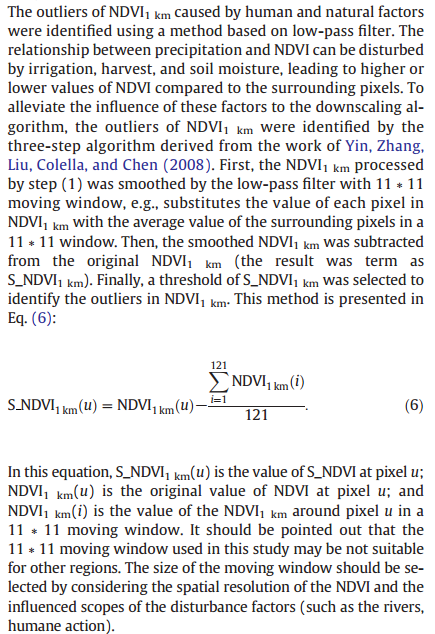

In [115]:
merged_dataset = xr.open_dataset('D:/Desktop/mentor_research/code/GWR/merged_dataset_025_cleaned.nc')
merged_dataset

<xarray.Dataset>
Dimensions:        (lons: 48, lats: 32, time: 12)
Coordinates:
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
Data variables:
    ndvi           (time, lats, lons) float64 ...
    precipitation  (time, lats, lons) float32 ...
    elevation      (time, lats, lons) float32 ...

In [51]:
merged_dataset['ndvi'] = merged_dataset['ndvi'].where(merged_dataset['ndvi'] >= 0, np.nan)
negative_count = (merged_dataset.ndvi < 0).sum().item()
print(f"Number of NDVI values < 0 after replacement: {negative_count}") # Should output 0

Number of NDVI values < 0 after replacement: 0


In [52]:
merged_dataset

<xarray.Dataset>
Dimensions:        (lons: 48, lats: 32, time: 12)
Coordinates:
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time           (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
Data variables:
    ndvi           (time, lats, lons) float64 0.0 0.0193 ... 0.3002 0.3768
    precipitation  (time, lats, lons) float32 ...
    elevation      (time, lats, lons) float32 ...

In [63]:
subset3m = merged_dataset.isel(time=slice(0, 1))
print(subset3m)

<xarray.Dataset>
Dimensions:        (lons: 48, lats: 32, time: 1)
Coordinates:
  * lons           (lons) float64 -8.875 -8.625 -8.375 ... 2.375 2.625 2.875
  * lats           (lats) float64 36.12 36.38 36.62 36.88 ... 43.38 43.62 43.88
  * time           (time) datetime64[ns] 2001-01-01
Data variables:
    ndvi           (time, lats, lons) float64 0.0 0.0193 ... 0.4298 0.4608
    precipitation  (time, lats, lons) float32 ...
    elevation      (time, lats, lons) float32 ...


In [ ]:
import numpy as np
import xarray as xr
import pandas as pd
from mgwr.gwr import GWR
from mgwr.sel_bw import Sel_BW

# Create a proper coordinate mesh grid for your data
lon_mesh, lat_mesh = np.meshgrid(subset3m.lons.values, subset3m.lats.values)

# Prepare data for each month
results = {}

# Function to manually compute GWR with fixed bandwidth
def manual_gwr(coords, y, X, bandwidth, kernel='bisquare'):
    """
    Simple GWR implementation to bypass mgwr package issues
    """
    n = coords.shape[0]
    k = X.shape[1]
    betas = np.zeros((n, k))
    y_pred = np.zeros(n)
    
    # For each observation point
    for i in range(n):
        # Calculate distances to all other points
        dists = np.sqrt(np.sum((coords - coords[i])**2, axis=1))
        
        # Apply kernel function to get weights
        if kernel == 'bisquare':
            weights = np.zeros(n)
            idx = dists <= bandwidth
            weights[idx] = (1 - (dists[idx]/bandwidth)**2)**2
        else:  # Gaussian kernel
            weights = np.exp(-0.5 * (dists/bandwidth)**2)
        
        # Weighted least squares for this point
        W = np.diag(weights)
        XtW = X.T @ W
        try:
            # Try to compute betas for this point
            betas[i] = np.linalg.solve(XtW @ X, XtW @ y)
            y_pred[i] = X[i] @ betas[i]
        except np.linalg.LinAlgError:
            # If matrix is singular, use pseudo-inverse
            betas[i] = np.linalg.pinv(XtW @ X) @ (XtW @ y)
            y_pred[i] = X[i] @ betas[i]
    
    # Calculate basic diagnostics
    residuals = y - y_pred
    SSE = np.sum(residuals**2)
    TSS = np.sum((y - np.mean(y))**2)
    r2 = 1 - SSE/TSS
    
    return {
        'betas': betas,
        'y_pred': y_pred,
        'residuals': residuals,
        'r2': r2,
        'coords':coords
    }

for month in range(1):#################################################################
    print(f"Processing month {month+1}...")
    
    try:
        # Extract data for the current month
        month_data = subset3m.isel(time=month)
        
        # Get variables as 2D arrays
        precip = month_data.precipitation.values
        ndvi_values = month_data.ndvi.values
        dem_values = month_data.elevation.values
        
        # Display the shape of each array for debugging
        print(f"  Shape of precipitation: {precip.shape}")
        print(f"  Shape of NDVI: {ndvi_values.shape}")
        print(f"  Shape of DEM: {dem_values.shape}")
        
        # Flatten everything for GWR
        lon_flat = lon_mesh.flatten()
        lat_flat = lat_mesh.flatten()
        coords = np.column_stack([lon_flat, lat_flat])
        
        precip_flat = precip.flatten()
        ndvi_flat = ndvi_values.flatten()
        dem_flat = dem_values.flatten()
        
        # Display stats of flattened arrays
        print(f"  Flat arrays - coords: {coords.shape}, precip: {precip_flat.shape}")
        print(f"  NaN count - precip: {np.isnan(precip_flat).sum()}, ndvi: {np.isnan(ndvi_flat).sum()}, dem: {np.isnan(dem_flat).sum()}")
        
        # Remove NaN values
        valid_idx = ~np.isnan(precip_flat) & ~np.isnan(ndvi_flat) & ~np.isnan(dem_flat)
        valid_coords = coords[valid_idx]
        valid_precip = precip_flat[valid_idx]
        valid_ndvi = ndvi_flat[valid_idx]
        valid_dem = dem_flat[valid_idx]
        
        # Display stats after NaN removal
        print(f"  After NaN removal - valid points: {valid_coords.shape[0]}")
        print(f"  Range of precip: {valid_precip.min()} to {valid_precip.max()}")
        print(f"  Range of NDVI: {valid_ndvi.min()} to {valid_ndvi.max()}")
        print(f"  Range of DEM: {valid_dem.min()} to {valid_dem.max()}")
        
        # Check for extreme DEM values but DO NOT assign NaN
        if valid_dem.min() <= 0:
            print(f"  Extreme DEM values detected: min = {valid_dem.min()}, max = {valid_dem.max()}")
    
            # Create mask to keep only DEM >= 0
            dem_mask = valid_dem >= 0
    
            # Apply mask to all variables
            valid_coords = valid_coords[dem_mask]
            valid_precip = valid_precip[dem_mask]
            valid_ndvi = valid_ndvi[dem_mask]
            valid_dem = valid_dem[dem_mask]

            print(f"  After DEM filtering - valid points: {valid_coords.shape[0]}")
            print(f"  Range of DEM: {valid_dem.min()} to {valid_dem.max()}")

        
        # Ensure we have sufficient data points
        if valid_coords.shape[0] < 20:
            print(f"  Not enough valid data points for month {month+1}, skipping...")
            continue
        
        # Prepare data for GWR
        valid_precip = valid_precip.reshape(-1)  # Ensure 1D
        
        # Models with intercept terms
        X_ndvi = np.column_stack([np.ones(valid_ndvi.shape[0]), valid_ndvi.reshape(-1, 1)])
        X_dem = np.column_stack([np.ones(valid_dem.shape[0]), valid_dem.reshape(-1, 1)])
        
        # Create valid_both BEFORE trying to use it
        valid_both = np.column_stack([valid_ndvi.reshape(-1, 1), valid_dem.reshape(-1, 1)])
        X_both = np.column_stack([np.ones(valid_both.shape[0]), valid_both])
        
        # Fixed bandwidth for all models - adjust based on your coordinate system
        # If your coordinates are in degrees (lat/lon), try a smaller value like 0.1
        fixed_bw = 0.1 if np.max(valid_coords) > 180 else 0.5
        
        print(f"  Using fixed bandwidth: {fixed_bw}")
        
        # Run simplified GWR models
        print("  Running manual GWR implementation...")
        
        # NDVI model
        gwr_ndvi_results = manual_gwr(valid_coords, valid_precip, X_ndvi, fixed_bw)
        
        # DEM model
        gwr_dem_results = manual_gwr(valid_coords, valid_precip, X_dem, fixed_bw)
        
        # Combined model
        gwr_both_results = manual_gwr(valid_coords, valid_precip, X_both, fixed_bw)
        
        # Store results for this month
        results[f'Month_{month+1}'] = {
            'GWRN': {
                'results': gwr_ndvi_results,
                'bandwidth': fixed_bw,
                'R2': gwr_ndvi_results['r2'],
                'coords': gwr_both_results['coords']
            },
            'GWRD': {
                'results': gwr_dem_results,
                'bandwidth': fixed_bw,
                'R2': gwr_dem_results['r2'],
                'coords': gwr_both_results['coords']
            },
            'GWRND': {
                'results': gwr_both_results,
                'bandwidth': fixed_bw,
                'R2': gwr_both_results['r2'],
                'coords': gwr_both_results['coords']
            }
        }
        
        print(f"  Month {month+1} completed")
        print(f"  GWRN R²: {gwr_ndvi_results['r2']:.4f}")
        print(f"  GWRD R²: {gwr_dem_results['r2']:.4f}")
        print(f"  GWRND R²: {gwr_both_results['r2']:.4f}")
        print("  ----------------------------")
    
    except Exception as e:
        print(f"  Error processing month {month+1}: {e}")
        import traceback
        traceback.print_exc()
        continue

# Evaluate which model performed best based on R²
print("\nModel Comparison Summary:")
for month, month_results in results.items():
    if month_results:  # Check if we have results for this month
        best_model = max(month_results.items(), key=lambda x: x[1]['R2'])
        print(f"{month}: Best model is {best_model[0]} with R²: {best_model[1]['R2']:.4f}")

# Create a more detailed summary table
summary_table = []
for month, models in results.items():
    if models:
        summary_table.append({
            'Month': month,
            'GWRN_R2': models['GWRN']['R2'],
            'GWRD_R2': models['GWRD']['R2'],
            'GWRND_R2': models['GWRND']['R2'],
            'Best_Model': max(models.items(), key=lambda x: x[1]['R2'])[0]
        })

if summary_table:
    summary_df = pd.DataFrame(summary_table)
    print("\nSummary Table:")
    print(summary_df)
    
    summary_df.to_csv('gwr_summary.csv', index=False)
    print("Summary saved to gwr_summary.csv")
    
    import pickle
    for month, models in results.items():
        if models:
            for model_name, model_data in models.items():

                complete_data = {
                    'coords': model_data['results']['coords'],
                    'betas': model_data['results']['betas'],
                    'bandwidth': model_data['bandwidth'],
                    'R2': model_data['R2']
                }

                with open(f"{month}_{model_name}_model.pkl", 'wb') as f:
                    pickle.dump(complete_data, f)
    

    results_df = []
    for month, models in results.items():
        if models:
            for model_name, metrics in models.items():
                results_df.append({
                    'Month': month,
                    'Model': model_name,
                    'R2': metrics['R2'],
                    'Bandwidth': metrics['bandwidth'],
                    'ModelFile': f"{month}_{model_name}_model.pkl" 
                })
    
pd.DataFrame(results_df).to_csv('gwr_detailed_results.csv', index=False)
print("Detailed results saved to gwr_detailed_results.csv")

Processing month 1...
  Shape of precipitation: (32, 48)
  Shape of NDVI: (32, 48)
  Shape of DEM: (32, 48)
  Flat arrays - coords: (1536, 2), precip: (1536,)
  NaN count - precip: 0, ndvi: 1, dem: 0
  After NaN removal - valid points: 1535
  Range of precip: 0.00379032245837152 to 0.6871069669723511
  Range of NDVI: 0.0 to 0.7596336076817557
  Range of DEM: -32767.0 to 2144.0
  Extreme DEM values detected: min = -32767.0, max = 2144.0
  After DEM filtering - valid points: 1390
  Range of DEM: 0.0 to 2144.0
  Using fixed bandwidth: 0.5
  Running manual GWR implementation...
  Month 1 completed
  GWRN R²: 0.9932
  GWRD R²: 0.9931
  GWRND R²: 0.9937
  ----------------------------

Model Comparison Summary:
Month_1: Best model is GWRND with R²: 0.9937

Summary Table:
     Month   GWRN_R2   GWRD_R2  GWRND_R2 Best_Model
0  Month_1  0.993152  0.993063  0.993667      GWRND
Summary saved to gwr_summary.csv
Detailed results saved to gwr_detailed_results.csv


# coef:0.25->1km, then Pred 1km precipitation

In [54]:
dem_ds_1km

<xarray.Dataset>
Dimensions:    (lons: 1336, lats: 892)
Coordinates:
    lon        (lons) float64 -8.996 -8.987 -8.978 -8.969 ... 2.979 2.988 2.997
    lat        (lats) float64 44.0 43.99 43.98 43.97 ... 36.02 36.01 36.01 36.0
Dimensions without coordinates: lons, lats
Data variables:
    elevation  (lats, lons) float32 -1.769e+04 -1.769e+04 ... 914.0 940.0
Attributes:
    title:        Iberian Peninsula Digital Elevation Model
    source:       SRTM DEM dataset from Google Earth Engine
    history:      Created on 2025-03-26
    resolution:   1 kilometer
    projection:   EPSG:4326
    references:   NASA SRTM
    Conventions:  CF-1.6

In [55]:
ndvi_ds_1km

<xarray.Dataset>
Dimensions:  (lats: 892, lons: 1336, time: 12)
Coordinates:
  * lats     (lats) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
  * lons     (lons) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
  * time     (time) datetime64[ns] 2001-01-01 2001-02-01 ... 2001-12-01
Data variables:
    ndvi     (time, lats, lons) float64 0.0 0.0 0.0 0.0 ... 0.1267 0.1267 0.1202

In [ ]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import xarray as xr

def predict_gwr_coefficients_batched(gwr_model_results, target_coords, bandwidth, kernel='bisquare', batch_size=10000):
    """
    Batched version of predict_gwr_coefficients to avoid memory issues
    """
    sample_coords = gwr_model_results['coords']
    sample_betas = gwr_model_results['betas']
    n_targets = target_coords.shape[0]
    n_coefs = sample_betas.shape[1]
    target_betas = np.zeros((n_targets, n_coefs))

    for start in range(0, n_targets, batch_size):
        end = min(start + batch_size, n_targets)
        batch_coords = target_coords[start:end]
        
        # Only compute distance for the current batch
        distances = cdist(batch_coords, sample_coords)
        
        for i in range(distances.shape[0]):
            if kernel == 'bisquare':
                weights = np.zeros(distances.shape[1])
                idx = distances[i, :] <= bandwidth
                weights[idx] = (1 - (distances[i, idx] / bandwidth) ** 2) ** 2
            else:
                weights = np.exp(-0.5 * (distances[i, :] / bandwidth) ** 2)
            
            if np.sum(weights) > 0:
                weights = weights / np.sum(weights)
                target_betas[start + i, :] = np.sum(sample_betas * weights[:, np.newaxis], axis=0)
            else:
                target_betas[start + i, :] = np.nan  # fallback for empty kernel

    return target_betas


def predict_coefficients_for_1km_grid(ndvi_ds_1km, gwr_model_results, bandwidth=None):
    """
    Predict GWR coefficients for a 1km resolution grid using an established GWR model
    
    Parameters:
    ndvi_ds_1km: xarray.Dataset, NDVI dataset at 1km resolution
    gwr_model_results: dict, containing results from GWR model at coarser resolution
    bandwidth: float, kernel bandwidth from the established GWR model
    
    Returns:
    xarray.Dataset, predicted coefficients for each 1km pixel
    """
    # Extract center coordinates of each 1km pixel
    lons, lats = np.meshgrid(ndvi_ds_1km.lons.values, ndvi_ds_1km.lats.values)
    target_coords = np.column_stack([lons.flatten(), lats.flatten()])
    
    # Ensure we have the correct format of model results
    if isinstance(gwr_model_results, pd.DataFrame):
        # If it's a DataFrame, try to find the corresponding row
        model_row = gwr_model_results.iloc[0]  # Assume using the first row
        
        # DataFrame loaded from CSV won't include coords and betas arrays
        # Need to get these data from the original results
        import pickle
        month = model_row['Month']
        model_type = model_row['Model']
        
        # Try to get from the original results dictionary
        if 'results' in globals() and month in results and model_type in results[month]:
            gwr_model_results = {
                'coords': results[month][model_type]['results']['coords'],
                'betas': results[month][model_type]['results']['betas'],
                'bandwidth': results[month][model_type]['bandwidth']
            }
        else:
            raise ValueError(f"Cannot find complete model data for {month} {model_type}")
    
    # Use bandwidth from the model (if not provided)
    if bandwidth is None and 'bandwidth' in gwr_model_results:
        bandwidth = gwr_model_results['bandwidth']
    elif bandwidth is None:
        bandwidth = 0.25  # Default bandwidth
    
    # Predict regression coefficients for each 1km pixel
    predicted_betas = predict_gwr_coefficients_batched(gwr_model_results, target_coords, bandwidth)

    # Reshape predicted coefficients to grid format
    beta_intercept = predicted_betas[:, 0].reshape(lons.shape)
    beta_ndvi = predicted_betas[:, 1].reshape(lons.shape)
    
    # If model includes DEM, reshape DEM coefficient as well
    if predicted_betas.shape[1] > 2:
        beta_dem = predicted_betas[:, 2].reshape(lons.shape)
    
    # Create xarray Dataset to store the predicted coefficients
    ds_coefficients = xr.Dataset(
        data_vars={
            'intercept': (['lat', 'lon'], beta_intercept),
            'ndvi_coef': (['lat', 'lon'], beta_ndvi),
        },
        coords={
            'lat': ndvi_ds_1km.lats.values,
            'lon': ndvi_ds_1km.lons.values
        }
    )
    
    # Add DEM coefficient if available
    if predicted_betas.shape[1] > 2:
        ds_coefficients['dem_coef'] = (['lat', 'lon'], beta_dem)
    
    return ds_coefficients

gwr_model_result25 = pd.read_csv("D:/Desktop/mentor_research/code/gwr_detailed_results.csv")
# Call the modified method
# First check the type of gwr_model_result25
if isinstance(gwr_model_result25, pd.DataFrame):
    # Extract required information from DataFrame
    import pickle
    
    # Get results for specified month and model
    month_value = gwr_model_result25['Month'].iloc[0]  # e.g., 'Month_1'
    model_type = gwr_model_result25['Model'].iloc[0]   # e.g., 'GWRN'
    
    # Try to get complete model data from results dictionary
    if month_value in results and model_type in results[month_value]:
        model_data = {
            'coords': results[month_value][model_type]['results']['coords'],
            'betas': results[month_value][model_type]['results']['betas'],
            'bandwidth': results[month_value][model_type]['bandwidth']
        }
        ds_coefficients = predict_coefficients_for_1km_grid(ndvi_ds_1km, model_data)
    else:
        raise ValueError(f"Cannot find complete model data for {month_value} {model_type}")
else:
    # Assume we already have a correctly formatted dict
    ds_coefficients = predict_coefficients_for_1km_grid(ndvi_ds_1km, gwr_model_result25)

In [56]:
gwr_model_result25 = pd.read_csv('gwr_detailed_results.csv')

In [86]:
import numpy as np
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt
import xarray as xr
import pickle  # Add: for model loading

# ------------------- Original functions: unchanged -------------------
def predict_gwr_coefficients_batched(gwr_model_results, target_coords, bandwidth, kernel='bisquare', batch_size=10000):
    """
    Predict regression coefficients in batches to avoid memory overflow.
    """
    from scipy.spatial.distance import cdist

    sample_coords = gwr_model_results['coords']
    sample_betas = gwr_model_results['betas']
    n_targets = target_coords.shape[0]
    n_coefs = sample_betas.shape[1]
    target_betas = np.zeros((n_targets, n_coefs))

    for start in range(0, n_targets, batch_size):
        end = min(start + batch_size, n_targets)
        batch_coords = target_coords[start:end]
        distances = cdist(batch_coords, sample_coords)

        for i in range(distances.shape[0]):
            if kernel == 'bisquare':
                weights = np.zeros(distances.shape[1])
                idx = distances[i, :] <= bandwidth
                weights[idx] = (1 - (distances[i, idx] / bandwidth) ** 2) ** 2
            else:
                weights = np.exp(-0.5 * (distances[i, :] / bandwidth) ** 2)

            if np.sum(weights) > 0:
                weights = weights / np.sum(weights)
                target_betas[start + i, :] = np.sum(sample_betas * weights[:, np.newaxis], axis=0)
            else:
                target_betas[start + i, :] = np.nan  # fallback if no neighbors

    return target_betas


def predict_coefficients_for_1km_grid(ndvi_ds_1km, gwr_model_results, bandwidth=0.25):
    lons, lats = np.meshgrid(ndvi_ds_1km.lons.values, ndvi_ds_1km.lats.values)
    target_coords = np.column_stack([lons.flatten(), lats.flatten()])
    predicted_betas = predict_gwr_coefficients_batched(gwr_model_results, target_coords, bandwidth)

    beta_intercept = predicted_betas[:, 0].reshape(lons.shape)
    beta_ndvi = predicted_betas[:, 1].reshape(lons.shape)

    ds_coefficients = xr.Dataset(
        data_vars={
            'intercept': (['lat', 'lon'], beta_intercept),
            'ndvi_coef': (['lat', 'lon'], beta_ndvi),
        },
        coords={
            'lat': ndvi_ds_1km.lats.values,
            'lon': ndvi_ds_1km.lons.values
        }
    )

    if predicted_betas.shape[1] > 2:
        beta_dem = predicted_betas[:, 2].reshape(lons.shape)
        ds_coefficients['dem_coef'] = (['lat', 'lon'], beta_dem)

    return ds_coefficients


# Modified: Extract model name from CSV & read corresponding .pkl file
month_value = gwr_model_result25['Month'].iloc[2]   # e.g. 'Month_1'
model_type = gwr_model_result25['Model'].iloc[2]    # e.g. 'GWRND'

# Load .pkl model results
with open(f"{month_value}_{model_type}_model.pkl", 'rb') as f:
    model_data = pickle.load(f)

# Call prediction function with correct parameters
ds_coefficients = predict_coefficients_for_1km_grid(ndvi_ds_1km, model_data, bandwidth=model_data['bandwidth'])

# Optional: Save results
ds_coefficients.to_netcdf(f"{month_value}_{model_type}_predicted_coefficients_1km.nc")
print("Prediction complete, results saved.")

Prediction complete, results saved.


In [139]:
with open(f"D:/Desktop/mentor_research/code/Month_1_GWRND_model.pkl", 'rb') as f:
    model_data = pickle.load(f)
model_data

{'coords': array([[-8.875, 36.125],
        [-8.625, 36.125],
        [-8.375, 36.125],
        ...,
        [ 2.375, 43.875],
        [ 2.625, 43.875],
        [ 2.875, 43.875]]),
 'betas': array([[ 4.57389007e-02, -5.19687746e-01,  3.76901899e-03],
        [ 4.37349058e-02, -4.43585478e-03,  9.38774613e-05],
        [ 4.28488286e-02,  3.37492544e-02, -3.48366453e-05],
        ...,
        [ 1.68824905e-01, -7.13280957e-04,  1.57602828e-05],
        [ 1.46533480e-01,  4.00830269e-02,  3.65002697e-05],
        [ 1.07270422e-01,  1.27341257e-01,  3.89198505e-05]]),
 'bandwidth': 0.5,
 'R2': 0.9936666104042141}

In [87]:
ds_coefficients

<xarray.Dataset>
Dimensions:    (lat: 892, lon: 1336)
Coordinates:
  * lat        (lat) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
  * lon        (lon) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
Data variables:
    intercept  (lat, lon) float64 0.5093 0.5092 0.5091 ... 0.4681 0.473 0.478
    ndvi_coef  (lat, lon) float64 0.0 0.0 0.0 0.0 ... -0.2038 -0.2107 -0.2179
    dem_coef   (lat, lon) float64 0.0 0.0 0.0 ... -0.0001257 -0.0001264

In [88]:
# OK. Iterate through each row in the DataFrame
for index, row in gwr_model_result25.iterrows():
    month_value = row['Month']        # e.g. 'Month_1'
    model_type = row['Model']         # e.g. 'GWRN', 'GWRD', 'GWRND'
    
    print(f"Processing {month_value} {model_type} model...")
    
    # Load .pkl model results
    model_file = row['ModelFile'] if 'ModelFile' in row else f"{month_value}_{model_type}_model.pkl"
    
    try:
        with open(model_file, 'rb') as f:
            model_data = pickle.load(f)
        
        # Call prediction function with correct parameters
        bandwidth = model_data.get('bandwidth', row['Bandwidth'])
        ds_coefficients = predict_coefficients_for_1km_grid(ndvi_ds_1km, model_data, bandwidth=bandwidth)
        
        # Store the coefficients with a name that indicates month and model type
        # You can either save to separate files or store in a dictionary
        
        # Option 1: Save to separate files
        output_file = f"{month_value}_{model_type}_predicted_coefficients_1km.nc"
        ds_coefficients.to_netcdf(output_file)
        print(f"Saved coefficients to {output_file}")
        
        # Option 2: Store in a dictionary (useful if you need to use them later in the script)
        coef_dict = {} if 'coef_dict' not in locals() else coef_dict
        coef_dict[f"{month_value}_{model_type}"] = ds_coefficients
        
    except Exception as e:
        print(f"Error processing {month_value} {model_type}: {e}")
        continue

print("All models processed.")

Processing Month_1 GWRN model...
Saved coefficients to Month_1_GWRN_predicted_coefficients_1km.nc
Processing Month_1 GWRD model...
Saved coefficients to Month_1_GWRD_predicted_coefficients_1km.nc
Processing Month_1 GWRND model...
Saved coefficients to Month_1_GWRND_predicted_coefficients_1km.nc
All models processed.


# The $P_1km$ over the pixels except for the pixels eliminated(DEM<0) eg:GWRND

In [ ]:

output_folder = "D:/Desktop/mentor_research/code/P1km_w_nan"
# os.makedirs(output_folder, exist_ok=True)


In [111]:
# read Month_1_GWRND_predicted_coefficients_1km.nc
GWRND_coefficients = xr.open_dataset('Month_1_GWRND_predicted_coefficients_1km.nc')
GWRND_coefficients

<xarray.Dataset>
Dimensions:    (lon: 1336, lat: 892)
Coordinates:
  * lon        (lon) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
  * lat        (lat) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
Data variables:
    intercept  (lat, lon) float64 ...
    ndvi_coef  (lat, lon) float64 ...
    dem_coef   (lat, lon) float64 ...

In [99]:
ndvi_ds_1km
ndvi_ds_1km_1 = ndvi_ds_1km.sel(time='2001-01-01')
ndvi_ds_1km_1

<xarray.Dataset>
Dimensions:  (lats: 892, lons: 1336)
Coordinates:
  * lats     (lats) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
  * lons     (lons) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
    time     datetime64[ns] 2001-01-01
Data variables:
    ndvi     (lats, lons) float64 0.0 0.0 0.0 0.0 ... 0.1707 0.1707 0.1954

In [103]:
dem_ds_1km

<xarray.Dataset>
Dimensions:    (lons: 1336, lats: 892)
Coordinates:
    lon        (lons) float64 -8.996 -8.987 -8.978 -8.969 ... 2.979 2.988 2.997
    lat        (lats) float64 44.0 43.99 43.98 43.97 ... 36.02 36.01 36.01 36.0
Dimensions without coordinates: lons, lats
Data variables:
    elevation  (lats, lons) float32 -1.769e+04 -1.769e+04 ... 914.0 940.0
Attributes:
    title:        Iberian Peninsula Digital Elevation Model
    source:       SRTM DEM dataset from Google Earth Engine
    history:      Created on 2025-03-26
    resolution:   1 kilometer
    projection:   EPSG:4326
    references:   NASA SRTM
    Conventions:  CF-1.6

C:\Users\18857\AppData\Local\Temp\ipykernel_79720\4211268600.py:3: UserWarning: rename 'lats' to 'lat' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  dem_ds = dem_ds_1km.rename({'lats': 'lat', 'lons': 'lon'})
C:\Users\18857\AppData\Local\Temp\ipykernel_79720\4211268600.py:3: UserWarning: rename 'lons' to 'lon' does not create an index anymore. Try using swap_dims instead or use set_index after rename to create an indexed coordinate.
  dem_ds = dem_ds_1km.rename({'lats': 'lat', 'lons': 'lon'})


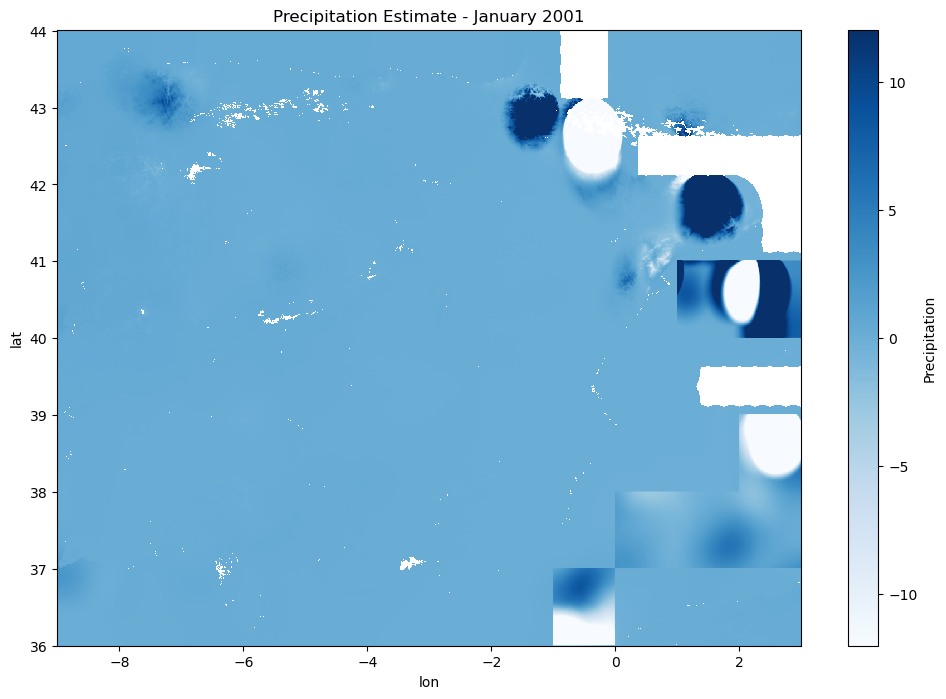

In [ ]:
#-------------------------------Should we set negative predictions to 0? -----------------------------------------#
# Rename coordinates for consistency
ndvi_ds = ndvi_ds_1km_1.rename({'lats': 'lat', 'lons': 'lon'})
dem_ds = dem_ds_1km.rename({'lats': 'lat', 'lons': 'lon'})

# Apply GWR formula for precipitation
precipitation = (GWRND_coefficients.intercept + 
               (GWRND_coefficients.ndvi_coef * ndvi_ds.ndvi) + 
               (GWRND_coefficients.dem_coef * dem_ds.elevation))

# Create dataset with precipitation data
precip_ds_1 = xr.Dataset(
   data_vars={'precipitation': (['lat', 'lon'], precipitation.values)},
   coords={
       'lat': GWRND_coefficients.lat,
       'lon': GWRND_coefficients.lon,
       'time': ndvi_ds.time
   },
   attrs={
       'title': 'Precipitation estimate for Iberian Peninsula',
       'source': 'GWR with NDVI and DEM data',
       'projection': 'EPSG:4326'
   }
)

# Save result
precip_ds_1.to_netcdf('precipitation_january_2001.nc')

# Visualize with single colorbar
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(12, 8))
im = precip_ds_1.precipitation.plot(ax=ax, cmap='Blues', robust=True, add_colorbar=False)
fig.colorbar(im, label='Precipitation')
plt.title('Precipitation Estimate - January 2001')
plt.savefig('precipitation_january_2001.png')

The image has some white areas with missing values

# The $P_1km$ over the pixels eliminated(simple spline tension interpolator)

Pixels to interpolate: 51545
Sampling 100000 points out of 1140167 for interpolation


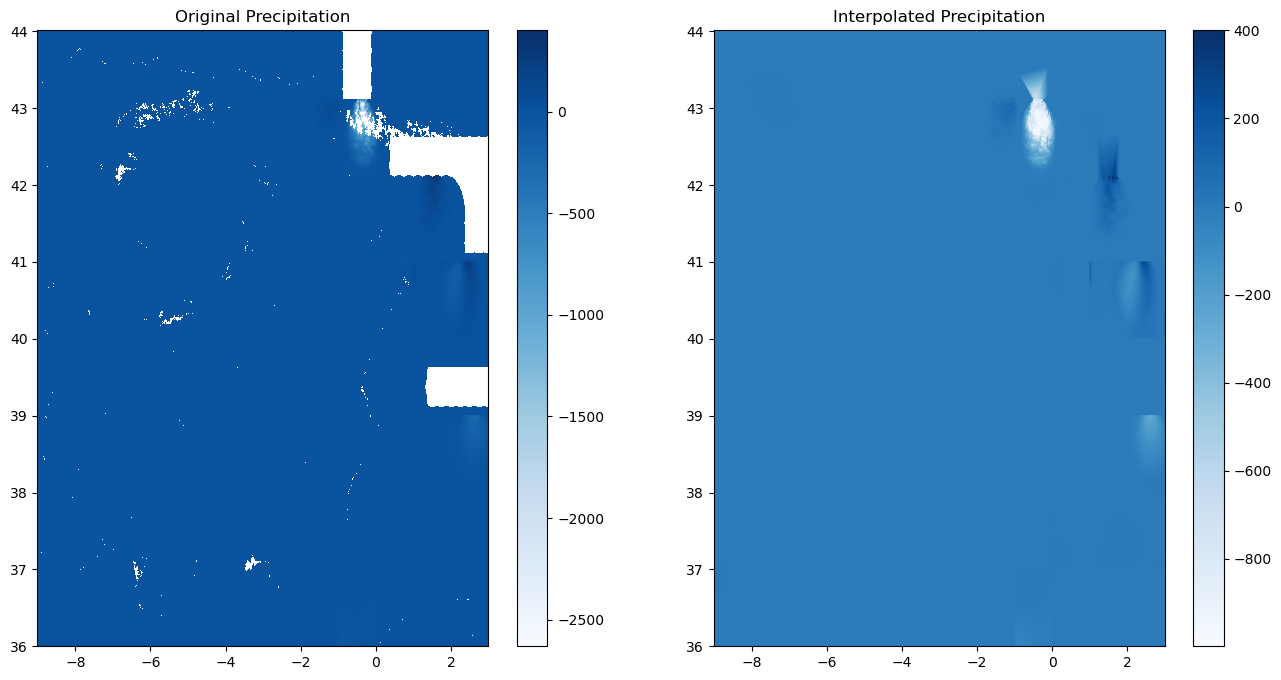

In [114]:
import xarray as xr
import numpy as np
from scipy.interpolate import LinearNDInterpolator
import matplotlib.pyplot as plt

# Read precipitation file
precip_ds = xr.open_dataset('precipitation_january_2001.nc')
precipitation = precip_ds.precipitation.values
lat = precip_ds.lat.values
lon = precip_ds.lon.values

# Create coordinate meshgrid
lon_grid, lat_grid = np.meshgrid(lon, lat)

# Identify missing values
mask = np.isnan(precipitation) | (precipitation < -999)

if np.any(mask):
    print(f"Pixels to interpolate: {np.sum(mask)}")
    
    # Extract valid points (randomly sample if too many points)
    valid_points = ~mask
    total_valid = np.sum(valid_points)
    
    # If too many valid points, sample a subset (adjust max_points as needed)
    max_points = 100000
    if total_valid > max_points:
        print(f"Sampling {max_points} points out of {total_valid} for interpolation")
        valid_indices = np.where(valid_points)
        sample_indices = np.random.choice(len(valid_indices[0]), max_points, replace=False)
        
        points = np.column_stack((valid_indices[0][sample_indices], valid_indices[1][sample_indices]))
        values = precipitation[points[:,0], points[:,1]]
        
        # Create points array for interpolation
        points_for_interp = np.column_stack((
            lon_grid[points[:,0], points[:,1]],
            lat_grid[points[:,0], points[:,1]]
        ))
    else:
        # Use all valid points
        points_for_interp = np.column_stack((
            lon_grid[valid_points],
            lat_grid[valid_points]
        ))
        values = precipitation[valid_points]
    
    # Create interpolator (using LinearNDInterpolator which is more memory efficient)
    interpolator = LinearNDInterpolator(points_for_interp, values)
    
    # Copy original data
    interpolated_precip = precipitation.copy()
    
    # Get coordinates of missing points
    missing_indices = np.where(mask)
    missing_points = np.column_stack((
        lon_grid[missing_indices],
        lat_grid[missing_indices]
    ))
    
    # Interpolate at missing points
    interpolated_values = interpolator(missing_points)
    interpolated_precip[missing_indices] = interpolated_values
    
    # Create and save interpolated dataset
    interpolated_ds = xr.Dataset(
        data_vars={'precipitation': (['lat', 'lon'], interpolated_precip)},
        coords=precip_ds.coords
    )
    interpolated_ds.to_netcdf('precipitation_january_2001_interpolated.nc')
    
    # Visualize comparison
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
    im1 = ax1.pcolormesh(lon, lat, precipitation, cmap='Blues', shading='auto')
    ax1.set_title('Original Precipitation')
    fig.colorbar(im1, ax=ax1)
    
    im2 = ax2.pcolormesh(lon, lat, interpolated_precip, cmap='Blues', shading='auto')
    ax2.set_title('Interpolated Precipitation')
    fig.colorbar(im2, ax=ax2)
    
    plt.savefig('precipitation_interpolation_comparison.png')
    
else:
    print("No missing values found")

In [ ]:
# 1km: precipitation_january_2001_interpolated.nc

# residual correction

In [117]:
gwr_both_results

{'betas': array([[ 4.57389007e-02, -5.19687746e-01,  3.76901899e-03],
        [ 4.37349058e-02, -4.43585478e-03,  9.38774613e-05],
        [ 4.28488286e-02,  3.37492544e-02, -3.48366453e-05],
        ...,
        [ 1.68824905e-01, -7.13280957e-04,  1.57602828e-05],
        [ 1.46533480e-01,  4.00830269e-02,  3.65002697e-05],
        [ 1.07270422e-01,  1.27341257e-01,  3.89198505e-05]]),
 'y_pred': array([0.0457389 , 0.04374315, 0.05202213, ..., 0.1759227 , 0.18613719,
        0.19685342]),
 'residuals': array([-0.000376  , -0.00378348,  0.00737303, ..., -0.00015679,
        -0.00070399,  0.00023418]),
 'r2': 0.9936666104042141,
 'coords': array([[-8.875, 36.125],
        [-8.625, 36.125],
        [-8.375, 36.125],
        ...,
        [ 2.375, 43.875],
        [ 2.625, 43.875],
        [ 2.875, 43.875]])}

In [ ]:
import numpy as np
import xarray as xr
import pandas as pd

residuals = gwr_both_results['residuals']
coords = gwr_both_results['coords']

lons = coords[:, 0]
lats = coords[:, 1]

unique_lons = np.sort(np.unique(lons))
unique_lats = np.sort(np.unique(lats))[::-1]

residuals_grid = np.full((len(unique_lats), len(unique_lons)), np.nan)

for lon, lat, res in zip(lons, lats, residuals):
    lon_idx = np.where(unique_lons == lon)[0][0]
    lat_idx = np.where(unique_lats == lat)[0][0]
    residuals_grid[lat_idx, lon_idx] = res

residuals_xr = xr.DataArray(
    data=residuals_grid,
    dims=['lats', 'lons'],
    coords={'lats': unique_lats, 'lons': unique_lons},
    name='residuals'
)

res = xr.Dataset({'residuals': residuals_xr})

print("Dataset dimensions:", res.dims)


Dataset dimensions: Frozen({'lats': 32, 'lons': 48})


<xarray.Dataset>
Dimensions:    (lats: 32, lons: 48)
Coordinates:
  * lats       (lats) float64 43.88 43.62 43.38 43.12 ... 36.62 36.38 36.12
  * lons       (lons) float64 -8.875 -8.625 -8.375 -8.125 ... 2.375 2.625 2.875
Data variables:
    residuals  (lats, lons) float64 0.005828 0.004136 ... -0.01445 -0.0004773

In [127]:
precip = xr.open_dataset('precipitation_january_2001_interpolated.nc')
precip

<xarray.Dataset>
Dimensions:        (lon: 1336, lat: 892)
Coordinates:
  * lon            (lon) float64 -9.001 -8.992 -8.983 ... 2.973 2.982 2.991
  * lat            (lat) float64 44.01 44.0 43.99 43.98 ... 36.02 36.01 36.0
    time           datetime64[ns] ...
Data variables:
    precipitation  (lat, lon) float64 ...

In [132]:
import xarray as xr
import numpy as np
from scipy import interpolate
import pandas as pd

ds = res.copy()

orig_lons = ds.lons.values
orig_lats = ds.lats.values
residuals = ds.residuals.values

new_lons = precip.lon.values
new_lats = precip.lat.values

lon_mesh, lat_mesh = np.meshgrid(orig_lons, orig_lats)

points = np.vstack((lat_mesh.flatten(), lon_mesh.flatten())).T
values = residuals.flatten()

valid_idx = ~np.isnan(values)
valid_points = points[valid_idx]
valid_values = values[valid_idx]

rbf = interpolate.RBFInterpolator(valid_points, valid_values, kernel='thin_plate_spline')

new_lon_mesh, new_lat_mesh = np.meshgrid(new_lons, new_lats)
new_points = np.vstack((new_lat_mesh.flatten(), new_lon_mesh.flatten())).T

# Interpolate
interpolated_values = rbf(new_points)
interpolated_residuals = interpolated_values.reshape(new_lat_mesh.shape)

new_res = xr.Dataset(
    data_vars={
        'residuals': (['lat', 'lon'], interpolated_residuals)
    },
    coords={
        'lat': new_lats,
        'lon': new_lons
    }
)


In [138]:
precip

<xarray.Dataset>
Dimensions:        (lon: 1336, lat: 892)
Coordinates:
  * lon            (lon) float64 -9.001 -8.992 -8.983 ... 2.973 2.982 2.991
  * lat            (lat) float64 44.01 44.0 43.99 43.98 ... 36.02 36.01 36.0
    time           datetime64[ns] ...
Data variables:
    precipitation  (lat, lon) float64 ...

In [133]:
new_res

<xarray.Dataset>
Dimensions:    (lat: 892, lon: 1336)
Coordinates:
  * lat        (lat) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
  * lon        (lon) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
Data variables:
    residuals  (lat, lon) float64 0.006787 0.006912 ... -0.004317 -0.004285

In [136]:
sum_result = precip['precipitation'] + new_res['residuals']
sum_result


<xarray.DataArray (lat: 892, lon: 1336)>
array([[0.51604956, 0.51609395, 0.51613643, ..., 0.13819157, 0.1382213 ,
        0.13836901],
       [0.51584908, 0.51589954, 0.51594818, ..., 0.20349717, 0.20824611,
        0.21001715],
       [0.51564455, 0.515701  , 0.5157557 , ..., 0.20359571, 0.20373875,
        0.20297915],
       ...,
       [0.04996009, 0.04961889, 0.04927785, ..., 0.30281472, 0.30521534,
        0.31551646],
       [0.04984591, 0.04951214, 0.04917877, ..., 0.30488973, 0.30158311,
        0.30809238],
       [0.0497397 , 0.04941341, 0.04908774, ..., 0.31887898, 0.31783306,
        0.3123307 ]])
Coordinates:
  * lon      (lon) float64 -9.001 -8.992 -8.983 -8.974 ... 2.973 2.982 2.991
  * lat      (lat) float64 44.01 44.0 43.99 43.98 ... 36.03 36.02 36.01 36.0
    time     datetime64[ns] ...

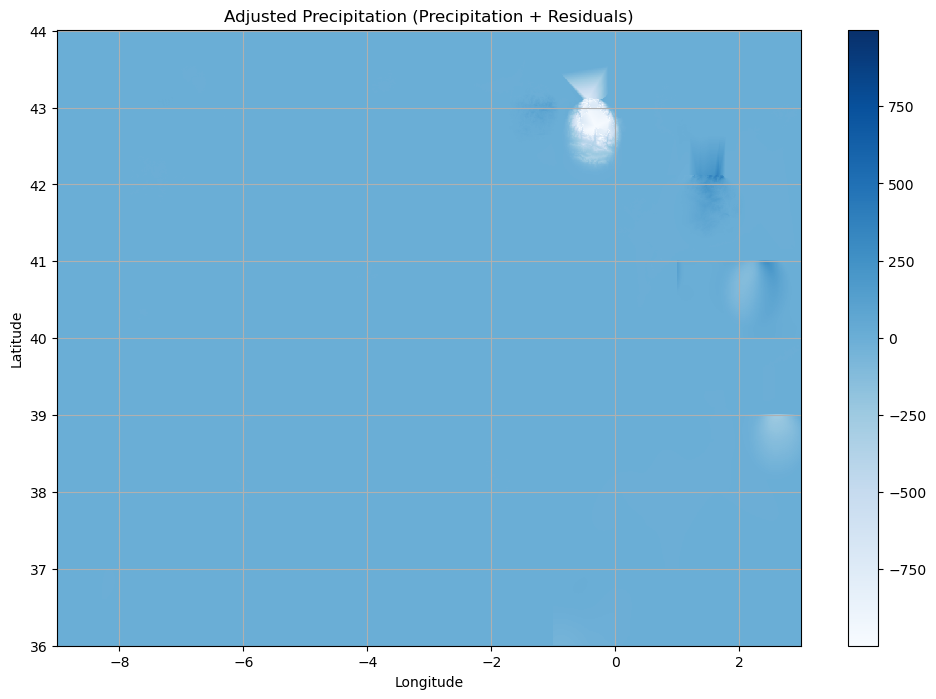

In [ ]:
import matplotlib.pyplot as plt

# plot sum_result
plt.figure(figsize=(12, 8))
sum_result.plot(cmap='Blues')
plt.title('Adjusted Precipitation (Precipitation + Residuals)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()
